## **MODUL 9 – Morphology**

Nama : Alfan Olivan

NIM : 2141720078

## **Praktikum**

### **Operasi Dilasi**

* Import library



In [195]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

* Dilasi tanpa library

In [196]:
img_plate = cv.imread('/content/drive/MyDrive/PCVK/plat-nomer.jpg',0)

In [197]:
# Define your dilation function
def dilation(input_image, structuring_element):
    p, q = input_image.shape
    constant1 = structuring_element.shape[0] // 2  # Get the size of the structuring element

    # Define a new image to store the pixels of the dilated image
    dilated_image = np.zeros((p, q), dtype=np.uint8)

    # Dilation operation without using the inbuilt CV2 function
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = input_image[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * structuring_element
            dilated_image[i, j] = np.max(product)

    return dilated_image


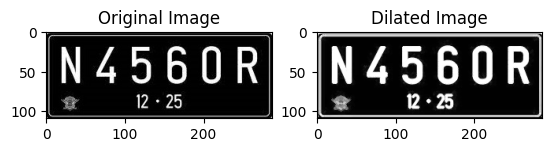

In [198]:
# Create a cross-shaped 3x3 structuring element
structuring_element = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)

# Perform dilation
dilated_image = dilation(img_plate, structuring_element)

# Display the original and dilated images
plt.subplot(121), plt.imshow(img_plate, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(dilated_image, cmap="gray"), plt.title("Dilated Image")
plt.show()

* Dilasi dengan library

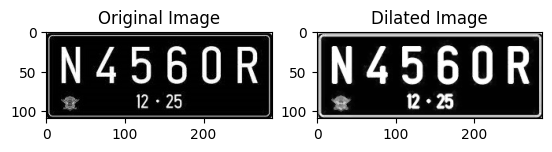

In [199]:
# Perform dilation using cv2.dilate
dilated_image_library = cv.dilate(img_plate, structuring_element)

# Display the original and dilated images
plt.subplot(121), plt.imshow(img_plate, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(dilated_image_library, cmap="gray"), plt.title("Dilated Image")
plt.show()

### **Operasi Erosi**

* Erosi tanpa library

In [200]:
def custom_erosion(input_image, structuring_element):
    m, n = input_image.shape
    k = structuring_element.shape[0]
    constant = (k - 1) // 2  # Get the size of the structuring element

    # Define a new image to store the pixels of the eroded image
    eroded_image = np.zeros((m, n), dtype=np.uint8)

    # Erosion operation without using the inbuilt CV2 function
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = input_image[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * structuring_element
            eroded_image[i, j] = np.min(product)

    return eroded_image

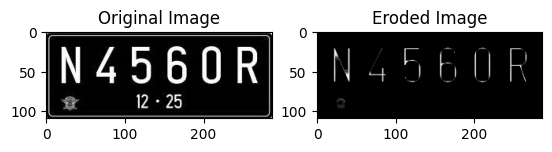

In [201]:
# Create a square-shaped 5x5 structuring element
structuring_element = np.ones((5, 5), dtype=np.uint8)

eroded_image = custom_erosion(img_plate, structuring_element)

# Display the original and eroded images
plt.subplot(121), plt.imshow(img_plate, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(eroded_image, cmap="gray"), plt.title("Eroded Image")
plt.show()

* Erosi dengan library

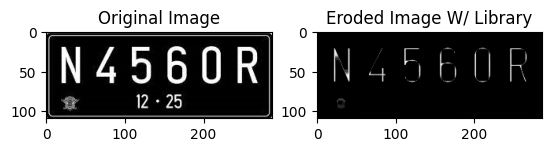

In [202]:
# Perform erosion using cv2.erode
eroded_image = cv.erode(img_plate, structuring_element)

# Display the original and eroded images
plt.subplot(121), plt.imshow(img_plate, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(eroded_image, cmap="gray"), plt.title("Eroded Image W/ Library")
plt.show()

### **Operasi Opening**

* Operasi opening tanpa library

In [203]:
def custom_opening(input_image, erosion_se, dilation_se):
    # Perform erosion
    eroded_image = custom_erosion(input_image, erosion_se)

    # Perform dilation on the eroded image
    opened_image = dilation(eroded_image, dilation_se)

    return opened_image

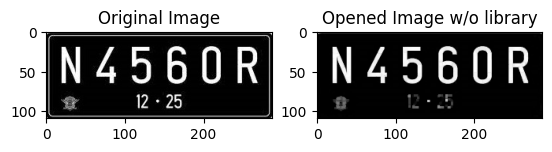

In [204]:
erosion_se = np.ones((3, 3), dtype=np.uint8)  # Square-shaped 3x3 structuring element for erosion
dilation_se = np.ones((3, 3), dtype=np.uint8)  # Square-shaped 3x3 structuring element for dilation

opened_image = custom_opening(img_plate, erosion_se, dilation_se)

# Display the original and opened images
plt.subplot(121), plt.imshow(img_plate, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(opened_image, cmap="gray"), plt.title("Opened Image w/o library")
plt.show()

* Operasi opening dengan library

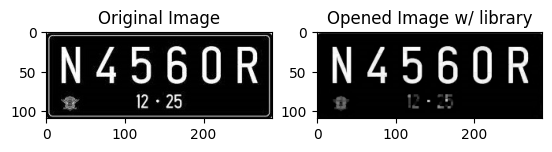

In [205]:
# Perform erosion using cv2.erode
eroded_image = cv.erode(img_plate, erosion_se)

# Perform dilation using cv2.dilate on the eroded image
opened_image = cv.dilate(eroded_image, dilation_se)

# Display the original and opened images
plt.subplot(121), plt.imshow(img_plate, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(opened_image, cmap="gray"), plt.title("Opened Image w/ library")
plt.show()

### **Operasi Closing**

* Operasi closing tanpa library

In [206]:
def custom_closing(input_image, dilation_se, erosion_se):
    # Perform dilation
    dilated_image = dilation(input_image, dilation_se)

    # Perform erosion on the dilated image
    closed_image = custom_erosion(dilated_image, erosion_se)

    return closed_image

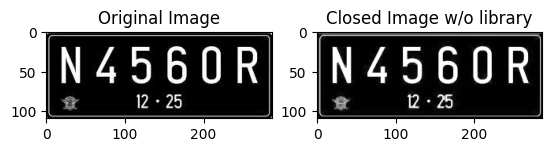

In [207]:
dilation_se = np.ones((3, 3), dtype=np.uint8)  # Square-shaped 3x3 structuring element for dilation
erosion_se = np.ones((3, 3), dtype=np.uint8)  # Square-shaped 3x3 structuring element for erosion

closed_image = custom_closing(img_plate, erosion_se, dilation_se)

# Display the original and opened images
plt.subplot(121), plt.imshow(img_plate, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(closed_image, cmap="gray"), plt.title("Closed Image w/o library")
plt.show()

* Operasi closing dengan library

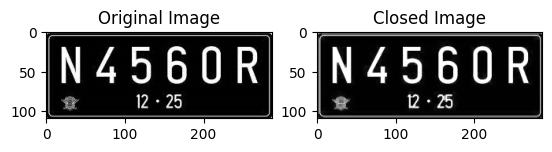

In [208]:
# Perform dilation using cv2.dilate
dilated_image = cv.dilate(img_plate, dilation_se)

# Perform erosion using cv2.erode on the dilated image
closed_image = cv.erode(dilated_image, erosion_se)

# Display the original and closed images
plt.subplot(121), plt.imshow(img_plate, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(closed_image, cmap="gray"), plt.title("Closed Image")
plt.show()

### **Operasi Dilasi - 2**

* Cross 3x3

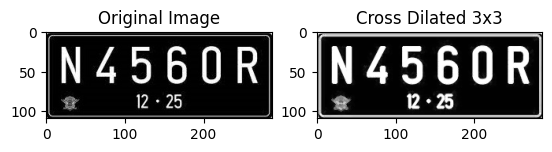

In [209]:
# Create a cross-shaped 3x3 structuring element
cross_3x3 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0],], dtype=np.uint8)

# Perform dilation using cv2.dilate with the 3x3 structuring element
dilated_image_3x3 = cv.dilate(img_plate, cross_3x3)

# Display the original image and dilated images
plt.subplot(121), plt.imshow(img_plate, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(dilated_image_3x3, cmap="gray"), plt.title("Cross Dilated 3x3")
plt.show()

* Cross 5x5

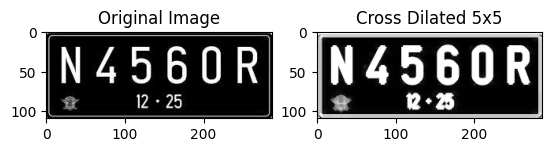

In [210]:
# Create a cross-shaped 5x5 structuring element
cross_5x5 = np.array([[0, 0, 1, 0, 0],
                      [0, 0, 1, 0, 0],
                      [1, 1, 1, 1, 1],
                      [0, 0, 1, 0, 0],
                      [0, 0, 1, 0, 0]], dtype=np.uint8)

# Perform dilation using cv2.dilate with the 5x5 structuring element
dilated_image_5x5 = cv.dilate(img_plate, cross_5x5)

# Display the original image and dilated images
plt.subplot(121), plt.imshow(img_plate, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(dilated_image_5x5, cmap="gray"), plt.title("Cross Dilated 5x5")
plt.show()

* Circular 3x3

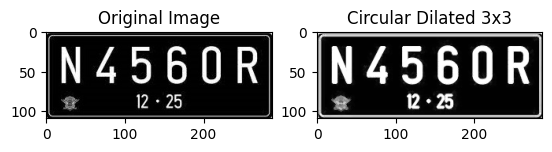

In [211]:
# Create a circular 3x3 structuring element
circle_3x3 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0],], dtype=np.uint8)

# Perform dilation using cv2.dilate with the 3x3 circular structuring element
dilated_image_3x3 = cv.dilate(img_plate, circle_3x3)

# Display the original image and dilated images
plt.subplot(121), plt.imshow(img_plate, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(dilated_image_3x3, cmap="gray"), plt.title("Circular Dilated 3x3")
plt.show()

* Circular 5x5

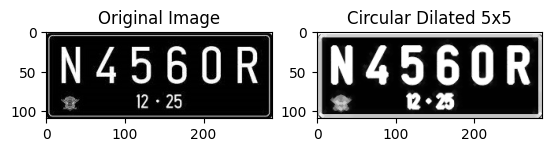

In [212]:

# Create a circular 5x5 structuring element
circle_5x5 = np.array([[0, 0, 1, 0, 0],
                      [0, 1, 1, 1, 0],
                      [1, 1, 1, 1, 1],
                      [0, 1, 1, 1, 0],
                      [0, 0, 1, 0, 0]], dtype=np.uint8)

# Perform dilation using cv2.dilate with the 5x5 circular structuring element
dilated_image_5x5 = cv.dilate(img_plate, circle_5x5)

# Display the original image and dilated images
plt.subplot(121), plt.imshow(img_plate, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(dilated_image_5x5, cmap="gray"), plt.title("Circular Dilated 5x5")
plt.show()

### **Operasi Erosi - 2**

* Rectangle 3 x 5

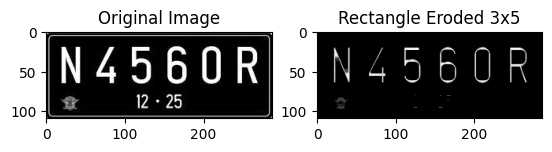

In [213]:
# Create a rectangular 3x5 structuring element
rect_3x5 = np.ones((3, 5), dtype=np.uint8)

# Perform erosion using cv2.erode with the 3x5 rectangular structuring element
eroded_image_3x5 = cv.erode(img_plate, rect_3x5)

# Display the original image and eroded images
plt.subplot(121), plt.imshow(img_plate, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(eroded_image_3x5, cmap="gray"), plt.title("Rectangle Eroded 3x5")
plt.show()


* Rectangle 5 x 7

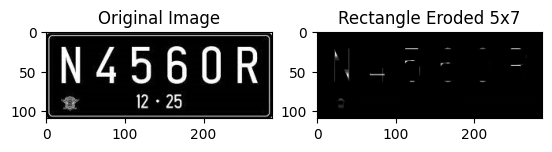

In [214]:
# Create a rectangular 5x7 structuring element
rect_5x7 = np.ones((5, 7), dtype=np.uint8)

# Perform erosion using cv2.erode with the 5x7 rectangular structuring element
eroded_image_5x7 = cv.erode(img_plate, rect_5x7)

# Display the original image and eroded images
plt.subplot(121), plt.imshow(img_plate, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(eroded_image_5x7, cmap="gray"), plt.title("Rectangle Eroded 5x7")
plt.show()

* Line Vertikal 3

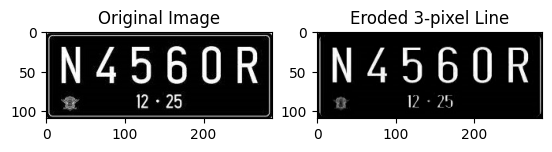

In [215]:
# Create a vertical line 3-pixel structuring element
line_3 = np.ones((3, 1), dtype=np.uint8)

# Perform erosion using cv2.erode with the 3-pixel vertical line structuring element
eroded_image_3 = cv.erode(img_plate, line_3)

# Display the original image and eroded images
plt.subplot(121), plt.imshow(img_plate, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(eroded_image_3, cmap="gray"), plt.title("Eroded 3-pixel Line")
plt.show()

* Line Vertikal 5

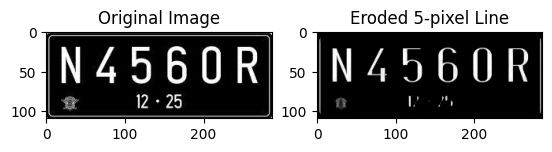

In [216]:
# Create a vertical line 5-pixel structuring element
line_5 = np.ones((5, 1), dtype=np.uint8)

# Perform erosion using cv2.erode with the 5-pixel vertical line structuring element
eroded_image_5 = cv.erode(img_plate, line_5)

# Display the original image and eroded images
plt.subplot(121), plt.imshow(img_plate, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(eroded_image_5, cmap="gray"), plt.title("Eroded 5-pixel Line")
plt.show()

### **Operasi Top Hat**

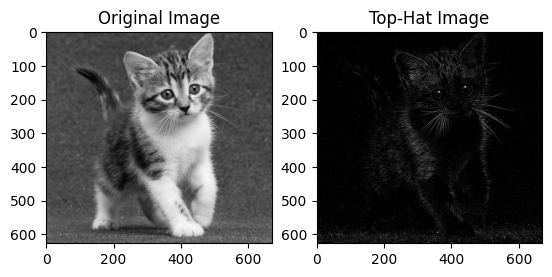

In [217]:
# Load the input image
input_image = cv.imread("/content/drive/MyDrive/PCVK/kitten01.jpg", 0)

# Create a rectangular 5x5 structuring element for opening
rect_5x5 = np.ones((5, 5), dtype=np.uint8)

# Perform opening using cv2.morphologyEx
opened_image = cv.morphologyEx(input_image, cv.MORPH_OPEN, rect_5x5)

# Calculate the top-hat image (difference between the input image and opened image)
tophat_image = cv.subtract(input_image, opened_image)

# Display the original image and the top-hat image
plt.subplot(121), plt.imshow(input_image, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(tophat_image, cmap="gray"), plt.title("Top-Hat Image")
plt.show()

### **Operasi Black Hat**

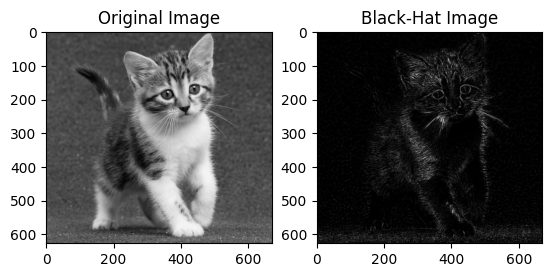

In [218]:
# Create a rectangular 5x5 structuring element for closing
rect_5x5 = np.ones((5, 5), dtype=np.uint8)

# Perform closing using cv2.morphologyEx
closed_image = cv.morphologyEx(input_image, cv.MORPH_CLOSE, rect_5x5)

# Calculate the black-hat image (difference between the closing and input image)
blackhat_image = cv.subtract(closed_image, input_image)

# Display the original image and the black-hat image
plt.subplot(121), plt.imshow(input_image, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(blackhat_image, cmap="gray"), plt.title("Black-Hat Image")
plt.show()


### **Operasi Skeleton**

In [219]:
def skeletonize_image(img):
    # Threshold the image
    ret, img = cv.threshold(img, 127, 255, 0)

    # Step 1: Create an empty skeleton
    size = np.size(img)
    skel = np.zeros(img.shape, np.uint8)

    # Get a Cross Shaped Kernel
    element = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

    # Repeat steps 2-4
    while True:
        # Step 2: Open the image
        opened = cv.morphologyEx(img, cv.MORPH_OPEN, element)

        # Step 3: Subtract open from the original image
        temp = cv.subtract(img, opened)

        # Step 4: Erode the original image and refine the skeleton
        eroded = cv.erode(img, element)
        skel = cv.bitwise_or(skel, temp)
        img = eroded.copy()

        # Step 5: If there are no white pixels left, i.e., the image has been completely eroded, quit the loop
        if cv.countNonZero(img) == 0:
            break

    return skel

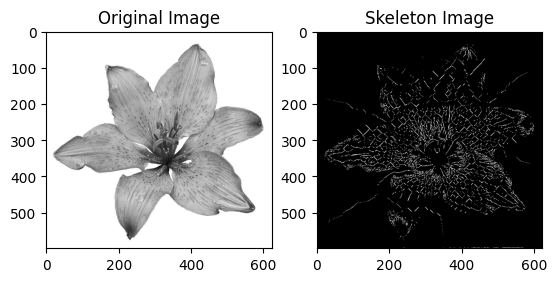

In [220]:
img_lily = cv.imread('/content/drive/MyDrive/PCVK/lily.jpg', 0)
skeleton = skeletonize_image(img_lily)

# Display the original image and the black-hat image
plt.subplot(121), plt.imshow(img_lily, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(skeleton, cmap="gray"), plt.title("Skeleton Image")
plt.show()

### **Skeleton Inverse**

In [221]:
def inverse_skeleton(skeleton):
    # Invert the black and white pixels
    inverted_skeleton = cv.bitwise_not(skeleton)

    return inverted_skeleton

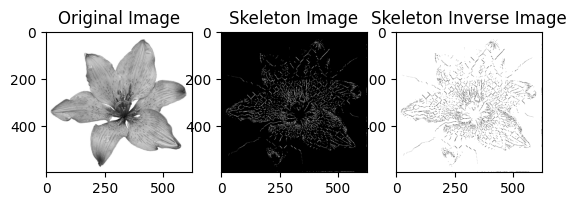

In [222]:
# Invert the skeleton
inverted_skeleton = inverse_skeleton(skeleton)

# Display the original image and the black-hat image
plt.subplot(131), plt.imshow(img_lily, cmap="gray"), plt.title("Original Image")
plt.subplot(132), plt.imshow(skeleton, cmap="gray"), plt.title("Skeleton Image")
plt.subplot(133), plt.imshow(inverted_skeleton, cmap="gray"), plt.title("Skeleton Inverse Image")
plt.show()

### **Operasi Thinning**

In [223]:
def thinning_image(input_image):
    # Structuring Element
    kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

    # Create an empty output image to hold values
    thin = np.zeros(input_image.shape, dtype='uint8')

    img1 = input_image.copy()

    # Loop until erosion leads to an empty set
    while (cv.countNonZero(img1) != 0):
        # Erosion
        erode = cv.erode(img1, kernel)
        # Opening on eroded image
        opening = cv.morphologyEx(erode, cv.MORPH_OPEN, kernel)
        # Subtract these two
        subset = erode - opening
        # Union of all previous sets
        thin = cv.bitwise_or(subset, thin)
        # Set the eroded image for the next iteration
        img1 = erode.copy()

    return thin

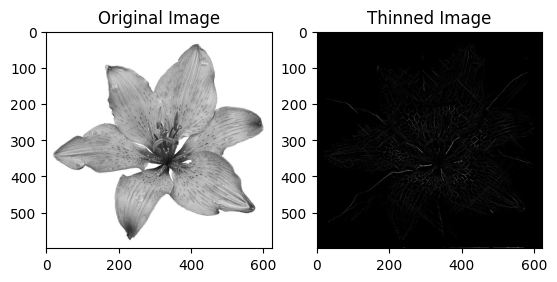

In [224]:
# Call the thinning function
thinned_image = thinning_image(img_lily)

# Display the original and thinned images using plt
plt.subplot(121)
plt.imshow(img_lily, cmap='gray')
plt.title("Original Image")

plt.subplot(122)
plt.imshow(thinned_image, cmap='gray')
plt.title("Thinned Image")

plt.show()

## **Tugas Praktikum**

In [99]:
!pip install pytesseract
!apt-get install tesseract-ocr

import pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,574 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

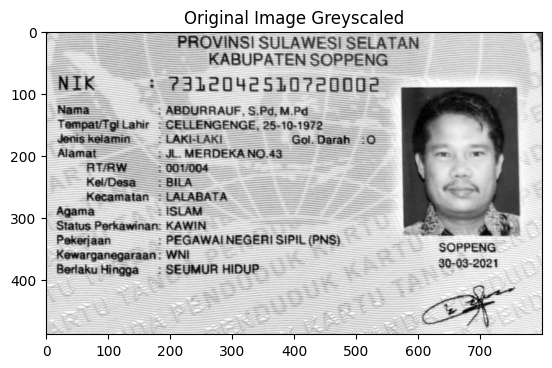

In [226]:
img_ktp = cv.imread('/content/drive/MyDrive/PCVK/ktp-test.png',0)

# Display the original and thinned images using plt
plt.imshow(img_ktp, cmap="gray")
plt.title("Original Image Greyscaled")

plt.show()

In [227]:
# Perform OCR on the image
text = pytesseract.image_to_string(img_ktp)

# Print the extracted text
print("Extracted Text Before Pre-Processing:")
print(text)

Extracted Text Before Pre-Processing:
: ABDURRAUF, S.Pd, MPa

ir SCELLENGENGE, 25-10-1972

> LAKILAKi Gol. Darah” =O
=JL. MERDEKA NO. 43°

> 001/004

= BA

= CALABATA

> ISLAM

: KAWIN
- Saas NEGERI SIPIL (PNS}

PROVINS! SULAWESI SELATAN
KABUPATEN SOPPENG

#3i204eS5h07 20002

SEL SEUMUR HIDUP

   

ae ab
SOPPENG
30-03-2021

FE



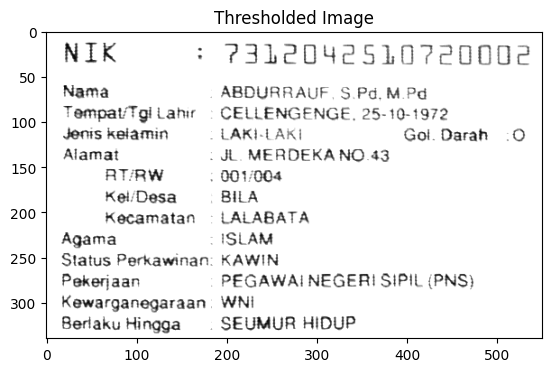

In [310]:
# Crop the image to the specified region
cropped_image = img_ktp[60:400, 0:550]

# Apply thresholding
ret, threshed = cv.threshold(cropped_image, 127, 255, cv.THRESH_TRUNC)

# Display the thresholded image using plt
plt.imshow(threshed, cmap='gray')
plt.title("Thresholded Image")
plt.show()

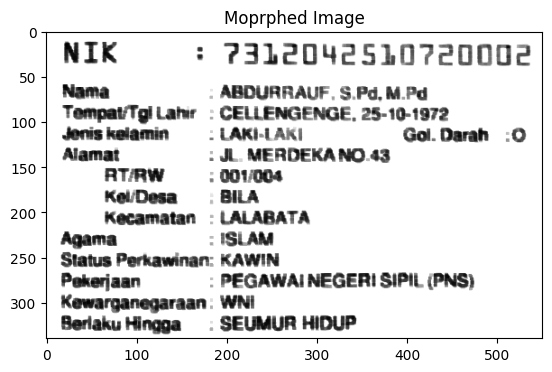

In [315]:
# Define the structuring element (SE)
se_size = (3, 3)  # Adjust the size as needed
se = np.ones(se_size, dtype=np.uint8)

eroded = cv.erode(threshed, se)

# Display the Morphed image using plt
plt.imshow(eroded, cmap='gray')
plt.title("Moprphed Image")
plt.show()

In [316]:
# Perform OCR on the image
text_preprocess = pytesseract.image_to_string(eroded)

# Print the extracted text
print("Extracted Text After Pre-Processing:\n")
print(text_preprocess)

Extracted Text After Pre-Processing:

NIK + 731204251072000e

Nama ABDURRAUF, S.Pd, M.Pd
Tempat/Tgi Lair - CELLENGENGE, 25-10-1972
Jeris kelamin - LAKI-LAKI Gol.Darah :O
Alamat : JL. MERDEKA NO.43
ATRW : 001/004
KelDesa BILA
Kecamatan - LALABATA

Agama ISLAM
Status Perkawinan: KAWIN
Pekerjaan : PEGAWAI NEGER! SIPIL (PNS)

Kewarganegaraan. WNi
Berlaku Hingga . SEUMUR HIDUP

